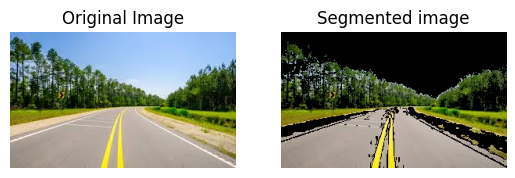

In [17]:
from PIL import Image
import cv2
import numpy as np
from skimage import io, color, feature, transform
import matplotlib.pyplot as plt


# Open the image with Pillow
image_path='training/dataset/train_images/roads/45.jpg'
image = Image.open(image_path)

# Convert the image to HSL
image_hsl = image.convert('HSV')

# Define the HSV-like ranges for green, yellow, gray, and red
green_lower = (35, 40, 40)
green_upper = (80, 255, 255)

yellow_lower = (20, 100, 100)
yellow_upper = (40, 255, 255)

gray_lower = (0, 0, 0)
gray_upper = (180, 50, 220)

# Red is a bit tricky due to the circular nature of the HSL color space
red_lower1 = (0, 100, 100)
red_upper1 = (10, 255, 255)

red_lower2 = (160, 100, 100)
red_upper2 = (180, 255, 255)

# Convert image to NumPy array for manipulation
image_array = np.array(image_hsl)

# Create masks based on the color ranges
green_mask = np.all((image_array >= green_lower) & (image_array <= green_upper), axis=-1)
yellow_mask = np.all((image_array >= yellow_lower) & (image_array <= yellow_upper), axis=-1)
gray_mask = np.all((image_array >= gray_lower) & (image_array <= gray_upper), axis=-1)
red_mask1 = np.all((image_array >= red_lower1) & (image_array <= red_upper1), axis=-1)
red_mask2 = np.all((image_array >= red_lower2) & (image_array <= red_upper2), axis=-1)

# Combine the masks
combined_mask = green_mask | yellow_mask | gray_mask | red_mask1 | red_mask2

# Apply the combined mask to the original image
segmented_image_array = image_array.copy()
segmented_image_array[~combined_mask] = 0

# Convert NumPy array back to Pillow image
segmented_image = Image.fromarray(segmented_image_array, 'HSV')

# Convert the segmented image back to RGB
segmented_image_rgb = segmented_image.convert('RGB')



# Display the original image and LBP texture analysis result
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image_rgb, cmap='gray')
plt.title('Segmented image')
plt.axis('off')

plt.show()



Dominant Hue: 107 degrees
Mean Color: [139.65885137 151.05347413 138.2547031 ]
Color Standard Deviation: [87.42483645 57.46925796 62.87249128]


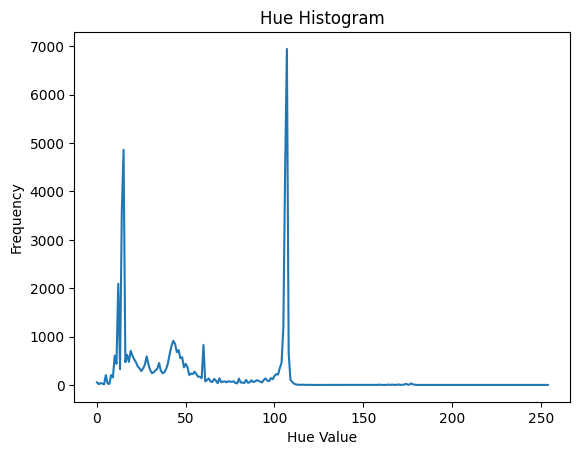

In [18]:

def extract_color_features(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Convert the image to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Calculate histogram of hue values
    hist_hue = cv2.calcHist([hsv], [0], None, [255], [0, 255])

    # Find the peak (dominant) hue value
    peak_hue = np.argmax(hist_hue)

    # Extract additional features
    mean_color = np.mean(img, axis=(0, 1))
    color_std = np.std(img, axis=(0, 1))

    print(f"Dominant Hue: {peak_hue} degrees")
    print(f"Mean Color: {mean_color}")
    print(f"Color Standard Deviation: {color_std}")

    # Plot the histogram
    plt.plot(hist_hue)
    plt.xlabel('Hue Value')
    plt.ylabel('Frequency')
    plt.title('Hue Histogram')
    plt.show()

# Example usage

extract_color_features(image_path)

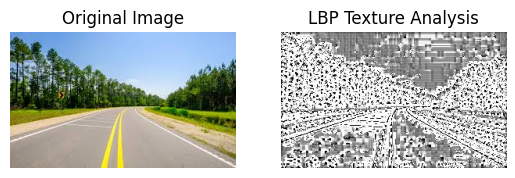

In [11]:

# Read the image
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Local Binary Pattern (LBP) texture analysis
radius = 3
n_points = 8 * radius
lbp = feature.local_binary_pattern(gray_image, n_points, radius, method='uniform')

# Convert LBP image to uint8
lbp = np.uint8((lbp / np.max(lbp)) * 255)

# Display the original image and LBP texture analysis result
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(lbp, cmap='gray')
plt.title('LBP Texture Analysis')
plt.axis('off')

plt.show()


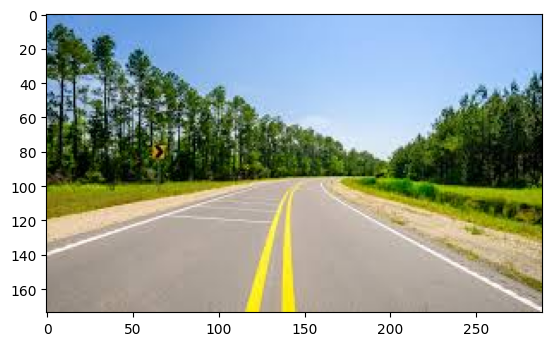

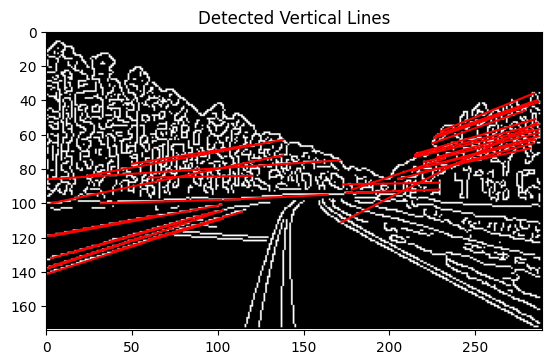

Number of vertical lines: 35 6567


In [12]:

# Load the image

image = io.imread(image_path)
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)
plt.show()

# Print the count of vertical lines
# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Apply edge detection (you can adjust parameters based on your image)
edges = feature.canny(gray_image, sigma=1)

# Use Probabilistic Hough Line Transform to detect lines
lines= transform.probabilistic_hough_line(edges)

# Filter lines based on their orientation (adjust the angle threshold as needed)
vertical_lines = [line for line in lines if np.abs(np.arctan2(line[1][1] - line[0][1], line[1][0] - line[0][0])) < np.pi / 6]

# Plot the results
fig, ax = plt.subplots()
ax.imshow(edges, cmap=plt.cm.gray)

for line in vertical_lines:
    ax.plot((line[0][0], line[1][0]), (line[0][1], line[1][1]), '-r')

ax.set_xlim((0, edges.shape[1]))
ax.set_ylim((edges.shape[0], 0))
ax.set_title('Detected Vertical Lines')

plt.show()

# Print the count of vertical lines
print(f'Number of vertical lines: {len(vertical_lines)}',edges.sum())


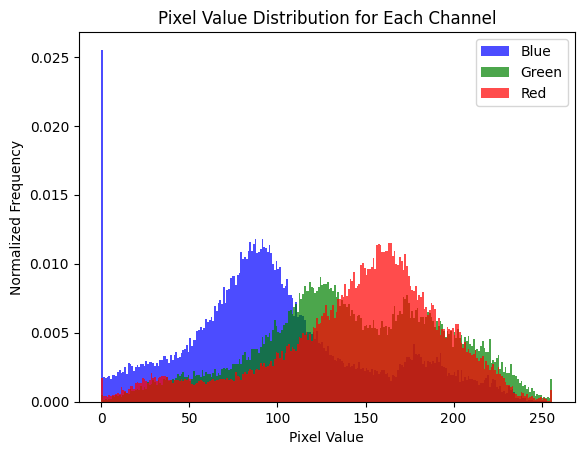

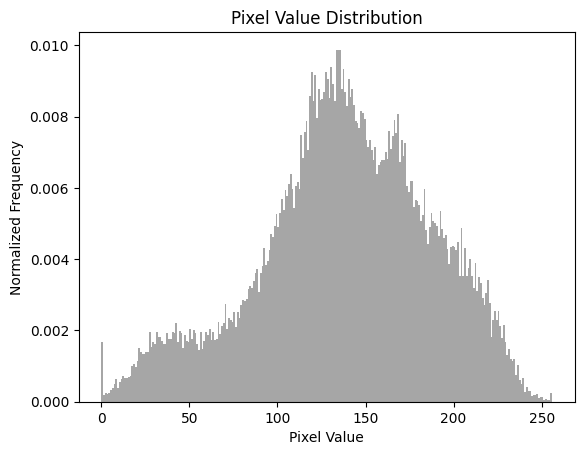

In [13]:


# Read the image in BGR
path='training/dataset/train_images/fields/40.jpg'
image = cv2.imread(path)

# Separate the channels
blue_channel = image[:, :, 0].flatten()
green_channel = image[:, :, 1].flatten()
red_channel = image[:, :, 2].flatten()

# Plot histograms for each channel
plt.hist(blue_channel, bins=256, range=[0, 256], density=True, color='blue', alpha=0.7, label='Blue')
plt.hist(green_channel, bins=256, range=[0, 256], density=True, color='green', alpha=0.7, label='Green')
plt.hist(red_channel, bins=256, range=[0, 256], density=True, color='red', alpha=0.7, label='Red')

plt.title('Pixel Value Distribution for Each Channel')
plt.xlabel('Pixel Value')
plt.ylabel('Normalized Frequency')
plt.legend()
plt.show()


# Read the image in grayscale
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

# Flatten the 2D array to 1D
pixel_values = image.flatten()

# Plot the histogram
plt.hist(pixel_values, bins=256, range=[0, 256], density=True, color='gray', alpha=0.7)
plt.title('Pixel Value Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Normalized Frequency')
plt.show()
